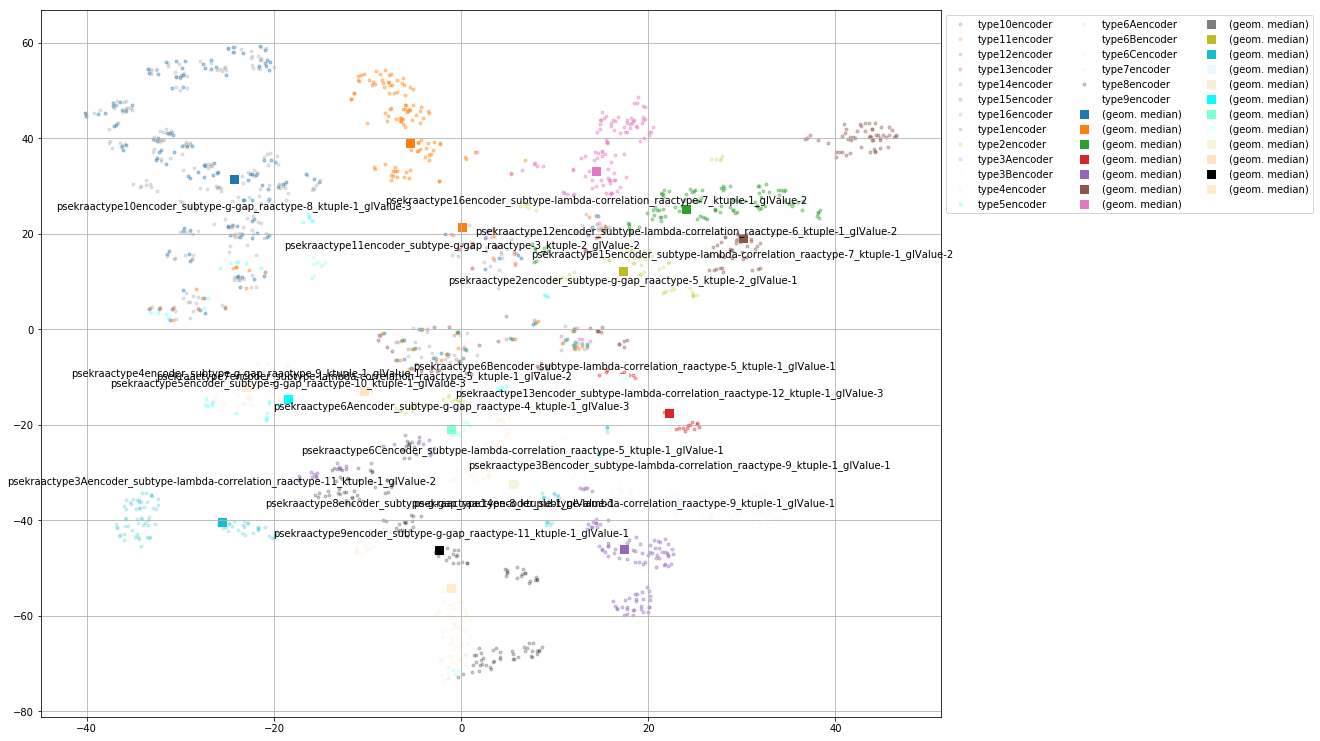

In [8]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

import pandas as pd

colors = list(dict(mcolors.TABLEAU_COLORS, **mcolors.CSS4_COLORS).keys())

fig, ax = plt.subplots()

df_gm = pd.read_csv("neuropeptides_ds1_normalized-yes_geometric_median.csv", index_col=0)

if not df_gm.empty:

    unames = df_gm.type.unique()

    for i in range(len(unames)):
        df_filtered = df_gm.loc[df_gm.name.apply(lambda x: unames[i] in x), :]
        ax.scatter(df_filtered.x1,
                   df_filtered.x2,
                   c=colors[i],
                   label=f"{unames[i]}",
                   alpha=0.2,
                   marker=".")

    for i in range(len(unames)):
        df_filtered = df_gm.loc[df_gm.name.apply(lambda x: unames[i] in x), :]
        df_filtered = df_filtered.loc[df_filtered["min_gm"].apply(lambda x: x == True), :]
        ax.scatter(df_filtered.x1,
                   df_filtered.x2,
                   marker="s",
                   s=70,
                   label=f"(geom. median)",
                   c=colors[i])
        if not df_filtered.empty:
            ax.text(df_filtered.x1.values[0],
                    df_filtered.x2.values[0] - (0.2 * df_filtered.x2.values[0]),
                    df_filtered.name.values[0],
                    ha="center")

    ax.legend(ncol=3, bbox_to_anchor=(1, 1), loc="upper left")
    ax.grid(True)

    fig = plt.gcf()
    fig.set_size_inches(20, 13)

    plt.subplots_adjust(right=0.75)
    # plt.title(f"{snakemake.wildcards.dataset}" + \
    #           f"{', normalized, ' if snakemake.wildcards.normalized == 'yes' else ', ' }" +
    #           f"TSNE")
    # plt.show()
    